In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

#model metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#cross validation
from sklearn.model_selection import cross_val_score

# helpers
%matplotlib inline

In [2]:
#import the data
credit = pd.read_csv('CreditOneDataEDA.csv')

In [3]:
#check the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              30000 non-null  int64
 1   ID                                      30000 non-null  int64
 2   LIMIT_BAL                               30000 non-null  int64
 3   MARRIAGE                                30000 non-null  int64
 4   AGE                                     30000 non-null  int64
 5   PAY_0                                   30000 non-null  int64
 6   PAY_2                                   30000 non-null  int64
 7   PAY_3                                   30000 non-null  int64
 8   PAY_4                                   30000 non-null  int64
 9   PAY_5                                   30000 non-null  int64
 10  PAY_6                                   30000 non-null  int64
 11  BILL_AMT1      

In [4]:
#drop an unneed column
credit = credit.drop(columns = ['default payment next month_not default'])

In [5]:
# check it
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Unnamed: 0                          30000 non-null  int64
 1   ID                                  30000 non-null  int64
 2   LIMIT_BAL                           30000 non-null  int64
 3   MARRIAGE                            30000 non-null  int64
 4   AGE                                 30000 non-null  int64
 5   PAY_0                               30000 non-null  int64
 6   PAY_2                               30000 non-null  int64
 7   PAY_3                               30000 non-null  int64
 8   PAY_4                               30000 non-null  int64
 9   PAY_5                               30000 non-null  int64
 10  PAY_6                               30000 non-null  int64
 11  BILL_AMT1                           30000 non-null  int64
 12  BILL

In [6]:
# slicing, selecting features/range of columns 
# planning to use default as the dependent variable
X = credit.iloc[:,2:28]
print('summary of feature sample')
X.head()

summary of feature sample


,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,0,0,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,0,0,0,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,1,0,0,0,0
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,1,0,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,1,0,0,0


In [7]:
# dependent variable is limit balance
y = credit['default payment next month_default']

In [8]:
# check the dependent variable
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: int64


In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 321)

In [10]:
# modeling with Random Forest Classifier
# default as dependent
RFC1 = RandomForestClassifier()
RFC_Model1 = RFC1.fit(X_train,y_train)

In [11]:
# prediction for the model above
RFC1_preds = RFC_Model1.predict(X_test)
print(classification_report(y_test, RFC1_preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7011
           1       0.65      0.36      0.47      1989

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000



In [12]:
# modeling with Gradient Boosting Classifier
# default as dependent
GBC1 = GradientBoostingClassifier()
GBC_Model1 = GBC1.fit(X_train,y_train)
#prediction for the model
GBC1_preds = GBC_Model1.predict(X_test)
print(classification_report(y_test, GBC1_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7011
           1       0.67      0.36      0.47      1989

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [13]:
# modeling with Decision Tree Classifier
# default as dependent
DTC1 = DecisionTreeClassifier(max_depth=5)
DTC_Model1 = DTC1.fit(X_train,y_train)
#prediction for the model
DTC1_preds = DTC_Model1.predict(X_test)
print(classification_report(y_test, DTC1_preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7011
           1       0.68      0.34      0.45      1989

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



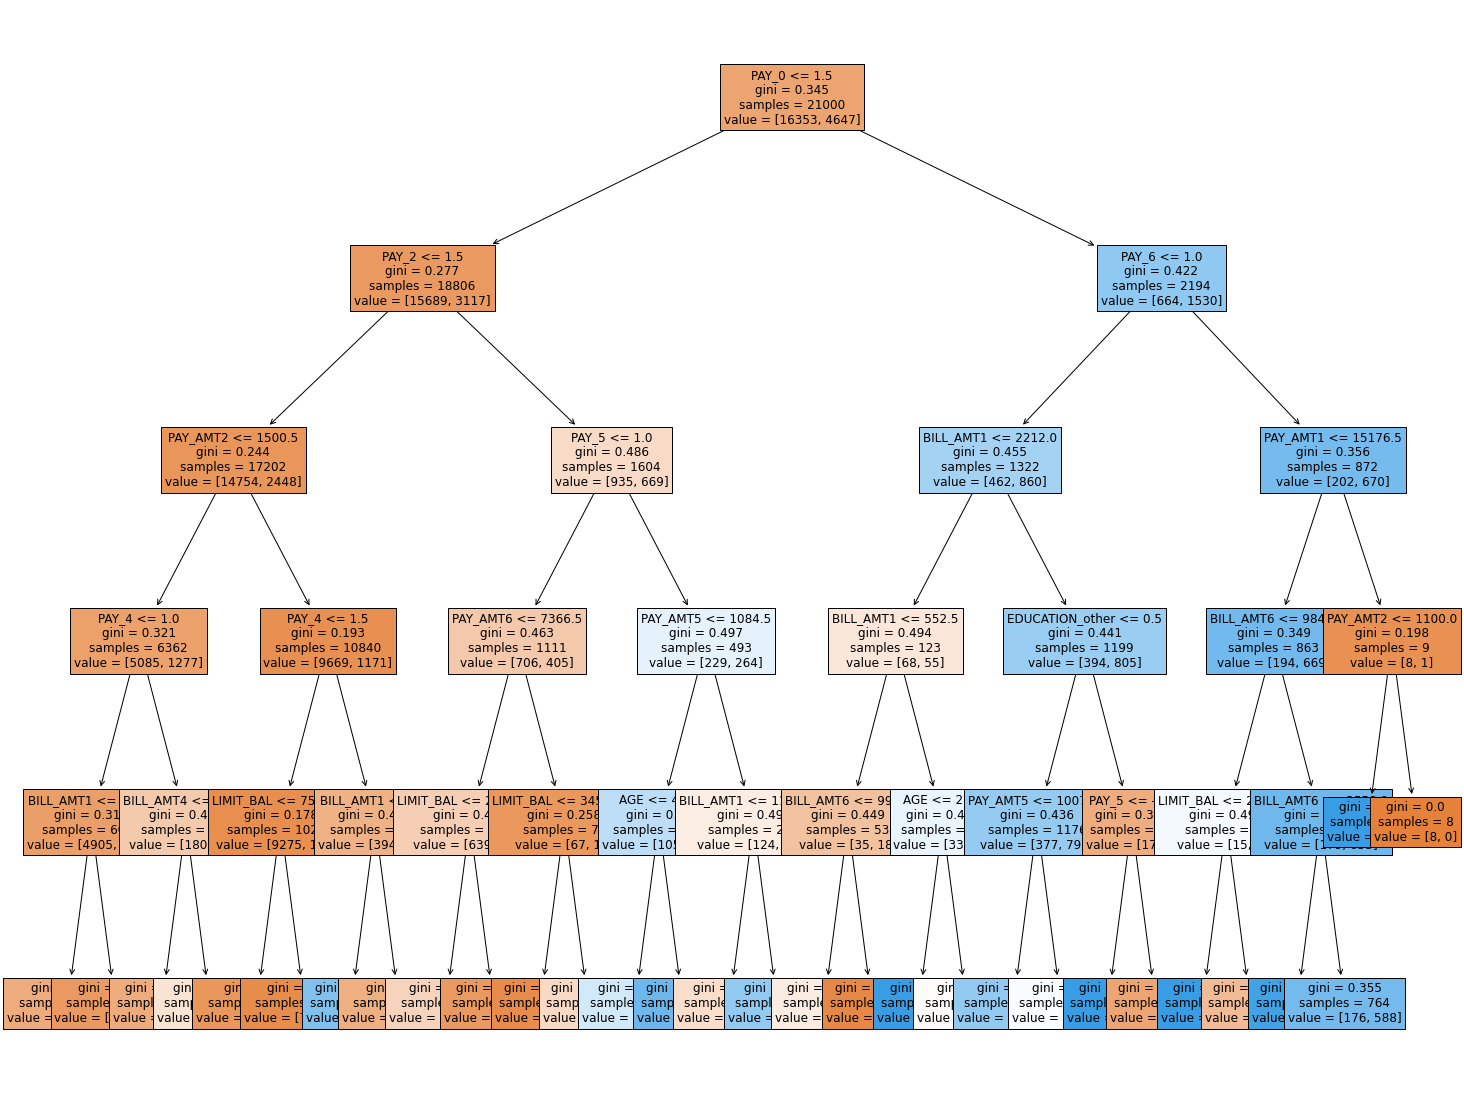

In [14]:
# visualize decision tree
fig = plt.figure(figsize=(25, 20))
tree = plot_tree(DTC_Model1, feature_names = X.columns,
                 filled=True, fontsize=12)

In [15]:
# modeling with KNeighbors Classifier
# default as dependent
KNC1 = KNeighborsClassifier()
KNC_Model1 = KNC1.fit(X_train,y_train)
#prediction for the model
KNC1_preds = KNC_Model1.predict(X_test)
print(classification_report(y_test, KNC1_preds))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      7011
           1       0.39      0.19      0.25      1989

    accuracy                           0.75      9000
   macro avg       0.59      0.55      0.55      9000
weighted avg       0.71      0.75      0.72      9000



In [16]:
# prepping classification algorithms
# compare these 4 classification algorithms
# this creates a copy and stores in the empty list
algosClass = []
algosClass.append(('Random Forest Classifier', RandomForestClassifier()))
algosClass.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algosClass.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algosClass.append(('KNeighbors Classifier', KNeighborsClassifier()))

In [17]:
# classification scoring comparison, default as dependent
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
        names.append(name)
        results.append(result)

In [18]:
# cross validation scores, default as dependent
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8170333333333334
Gradient Boosting Classifier 0.8203999999999999
Decision Tree Classifier 0.7261000000000001
KNeighbors Classifier 0.7531333333333333


In [19]:
# classification scoring comparison, default as dependent
# 5 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=5, scoring='accuracy')
        names.append(name)
        results.append(result)
# cross validation scores, limit balance in quartiles 
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8164666666666666
Gradient Boosting Classifier 0.8204666666666667
Decision Tree Classifier 0.7239333333333333
KNeighbors Classifier 0.7552333333333333
